<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-08 21:14:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  42.7MB/s    in 3.9s    

2025-01-08 21:14:38 (39.4 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


In [29]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,main


## Demo: Listing All Tables


To view the names of all tables in the database:


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


array([[<Axes: title={'center': 'CompTotal'}>]], dtype=object)

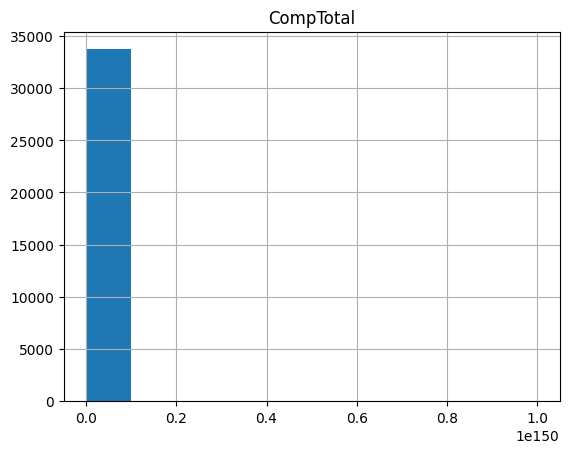

In [10]:
## Write your code here
QUERY = """SELECT * from main"""
df = pd.read_sql_query(QUERY,conn)
df.hist(column='CompTotal')

**Box Plots**

Plot a box plot of Age.


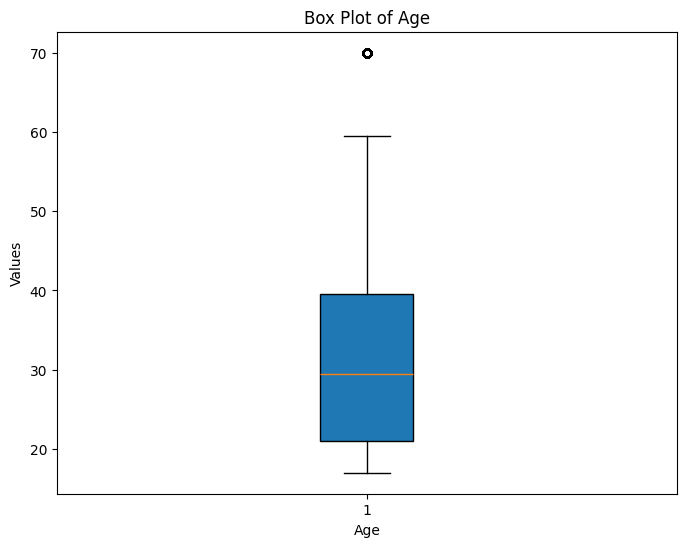

In [12]:
## Write your code here
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21, 
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5,
    '65 years or older': 70, 
    'Prefer not to say': None 
    # Or choose to exclude this category
}

expanded_ages = []
for _, row in df.iterrows(): 
    age_range = row['Age']
    count = row['count']
    if age_range in age_mapping and age_mapping[age_range] is not None:
        expanded_ages.extend([age_mapping[age_range]] * count)

# Create a DataFrame from the expanded ages
expanded_df = pd.DataFrame(expanded_ages, columns=['Age'])

plt.figure(figsize=(8, 6))
plt.boxplot(expanded_df['Age'], vert=True, patch_artist=True)
plt.title('Box Plot of Age') 
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [15]:
## Write your code here
import matplotlib.pyplot as plt
%matplotlib inline
!pip install seaborn
import seaborn as sns

Expanded DataFrame for Scatter Plot:         Age  WorkExp
0      17.0      NaN
1      39.5     17.0
2      49.5      NaN
3      21.0      NaN
4      21.0      NaN
...     ...      ...
65110  21.0      NaN
65111  29.5      NaN
65112  29.5      NaN
65113  21.0      5.0
65114  21.0      NaN

[65115 rows x 2 columns]


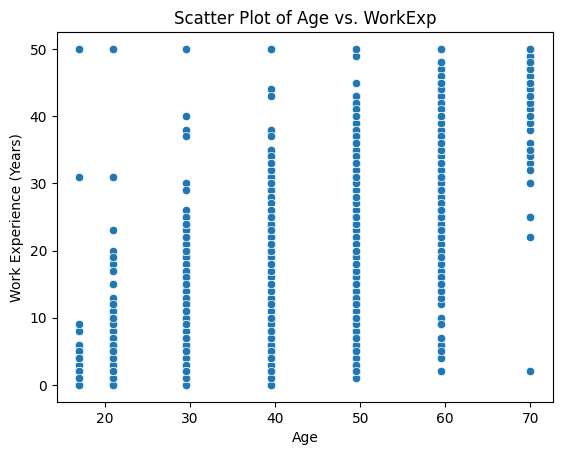

In [20]:
# Define the SQL query 
QUERY = """ SELECT Age, WorkExp FROM main """ 
# Execute the query and load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Mapping age ranges to numerical values (midpoints)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category 
}

# Expand the dataset based on counts
expanded_ages = [] 
work_exp = []
for _, row in df.iterrows():
    age_range = row['Age'] 
    if age_range in age_mapping and age_mapping[age_range] is not None:
        expanded_ages.append(age_mapping[age_range])
        work_exp.append(row['WorkExp']) 

# Create a DataFrame from the expanded ages and work week hours
expanded_df = pd.DataFrame({'Age': expanded_ages, 'WorkExp': work_exp})
print("Expanded DataFrame for Scatter Plot:",expanded_df)
# Create the scatter plot
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkExp', data=expanded_df)
plt.title('Scatter Plot of Age vs. WorkExp')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Expanded DataFrame for Bubble Plot:         Age TimeSearching Frustration
0      17.0          None        None
1      39.5          None        None
2      49.5          None        None
3      21.0          None        None
4      21.0          None        None
...     ...           ...         ...
65110  21.0          None        None
65111  29.5          None        None
65112  29.5          None        None
65113  21.0          None        None
65114  21.0          None        None

[65115 rows x 3 columns]


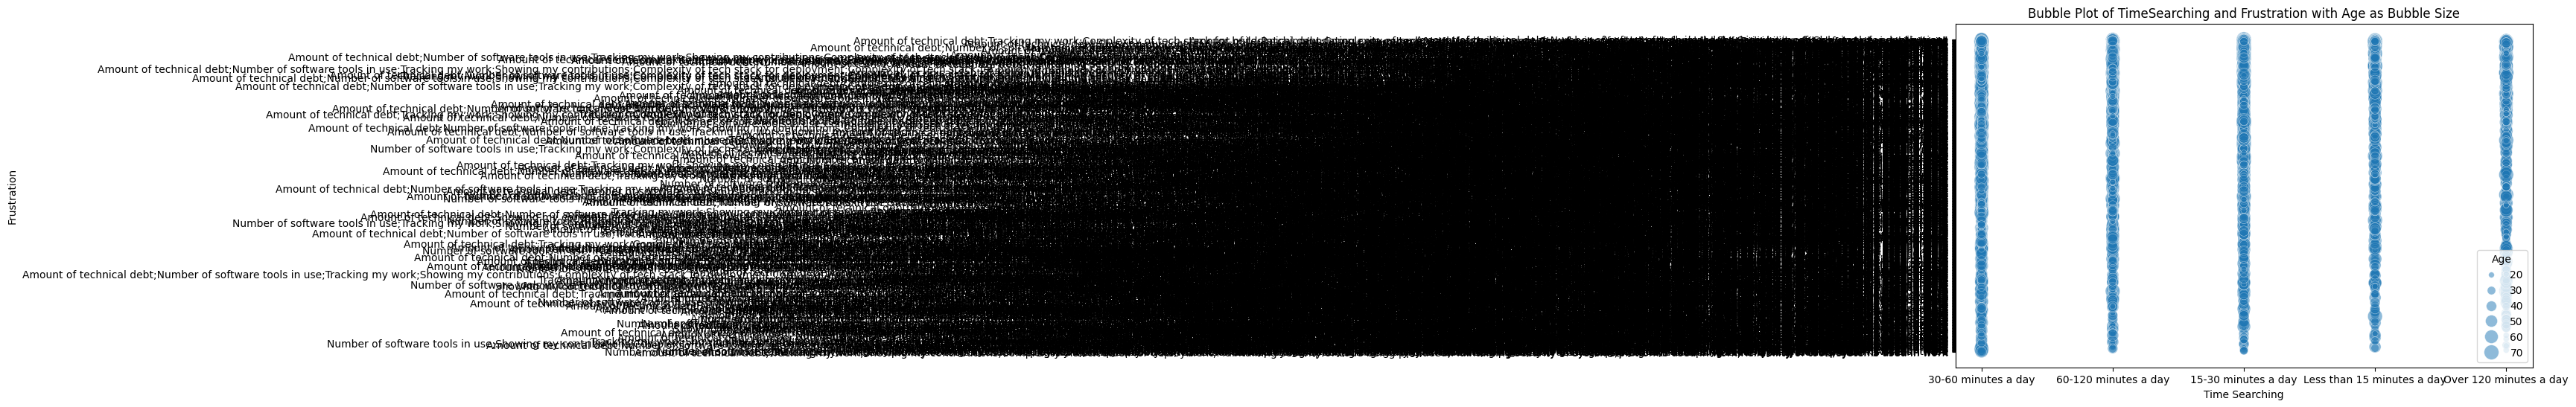

In [28]:
# Write your code here
query = """
SELECT Age, TimeSearching, Frustration
FROM main
"""
df = pd.read_sql_query(query, conn)

# Expand the dataset based on counts
expanded_ages = [] 
time_searching =[]
frustration = []

for _, row in df.iterrows():
    age_range = row['Age'] 
    if age_range in age_mapping and age_mapping[age_range] is not None:
        expanded_ages.append(age_mapping[age_range])
        time_searching.append(row['TimeSearching'])
        frustration.append(row['Frustration'])
# Ensure lengths match 
if len(expanded_ages) == len(time_searching) == len(frustration):
    # Create a DataFrame from the expanded ages, time searching, and frustration
    expanded_df = pd.DataFrame({'Age': expanded_ages, 'TimeSearching': time_searching, 'Frustration': frustration})
    print("Expanded DataFrame for Bubble Plot:", expanded_df)

    # Create the bubble plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=expanded_df, x='TimeSearching', y='Frustration', size='Age', sizes=(20, 200), alpha=0.5)
    plt.title('Bubble Plot of TimeSearching and Frustration with Age as Bubble Size')
    plt.xlabel('Time Searching')
    plt.ylabel('Frustration')
    plt.legend(title='Age')
    plt.show()
else: print("Lengths of expanded_ages, time_searching, and frustration do not match.")



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


Top 5 Databases that Respondents Wish to Learn Next Year: DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64


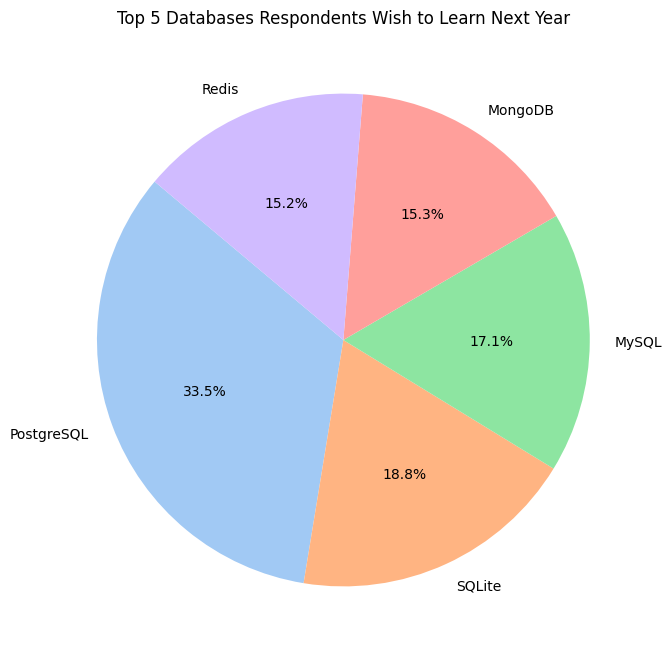

In [40]:
## Write your code here
# Define the SQL query
QUERY = """ 
SELECT DatabaseWantToWorkWith
FROM main
"""
# Execute the query and load data into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Split the column into individual database entries
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df = df.explode('DatabaseWantToWorkWith') 

# Count the occurrences of each database
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5) 
print("Top 5 Databases that Respondents Wish to Learn Next Year:", top_5_databases)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel')[0:5])
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


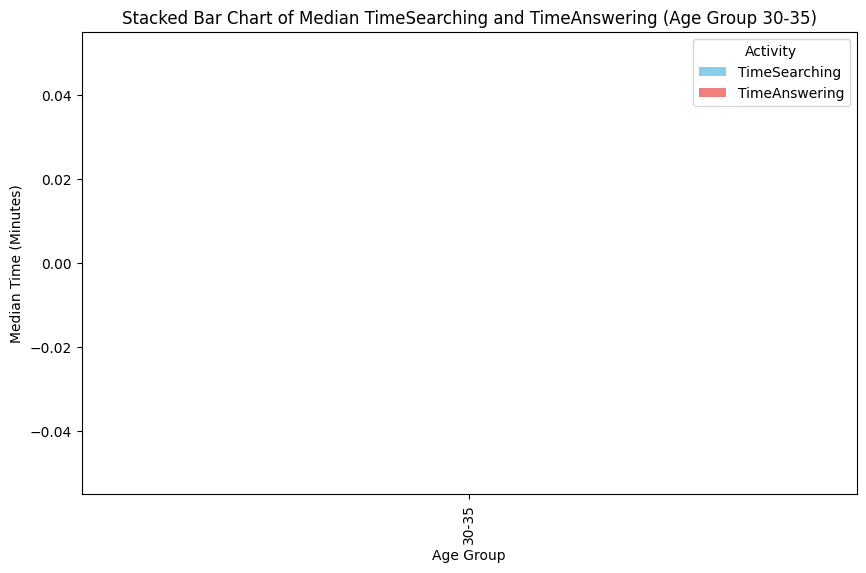

In [41]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category
} 
# Convert Age column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)
# Filter data for the age group 30 to 35
age_group_df = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]
# Calculate median values 
median_time_searching = age_group_df['TimeSearching'].median()
median_time_answering = age_group_df['TimeAnswering'].median()

# Create a DataFrame for the median values
median_df = pd.DataFrame({
    'Category': ['30-35'],
    'TimeSearching': [median_time_searching],
    'TimeAnswering': [median_time_answering]
})

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
median_df.set_index('Category').plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.title('Stacked Bar Chart of Median TimeSearching and TimeAnswering (Age Group 30-35)')
plt.xlabel('Age Group')
plt.ylabel('Median Time (Minutes)')
plt.legend(title='Activity')
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Median CompTotal for Ages 45 to 60:
   AgeNumeric  CompTotal
0        49.5   130000.0
1        59.5   135000.0


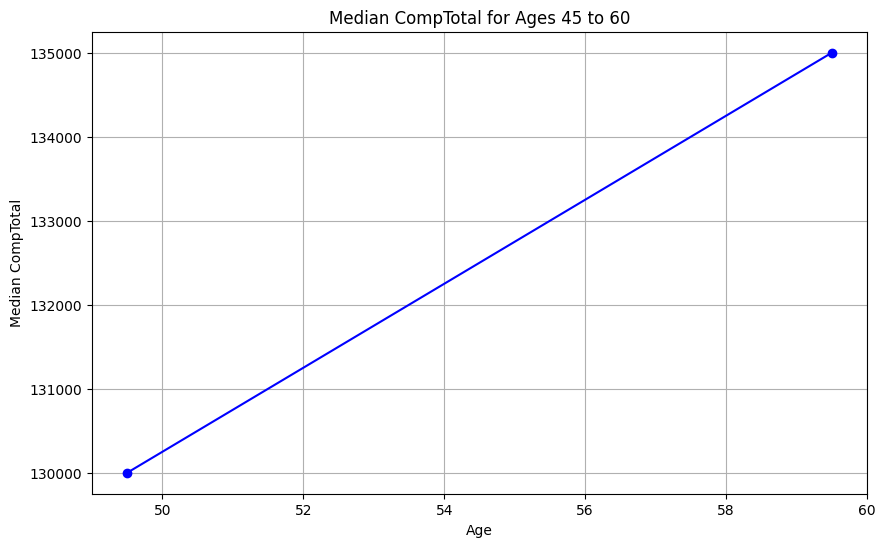

In [45]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
age_mapping = { 
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 29.5, 
    '35-44 years old': 39.5, 
    '45-54 years old': 49.5, 
    '55-64 years old': 59.5, 
    '65 years or older': 70, 
    'Prefer not to say': None # Or choose to exclude this category
}

# Convert Age column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)
# Filter data for the age group 30 to 35
age_group_df = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Calculate median CompTotal for each age
median_comp_total = age_group_df.groupby('AgeNumeric')['CompTotal'].median().reset_index()
print("Median CompTotal for Ages 45 to 60:")
print(median_comp_total)
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_total['AgeNumeric'], median_comp_total['CompTotal'], marker='o', linestyle='-', color='b')
plt.title('Median CompTotal for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


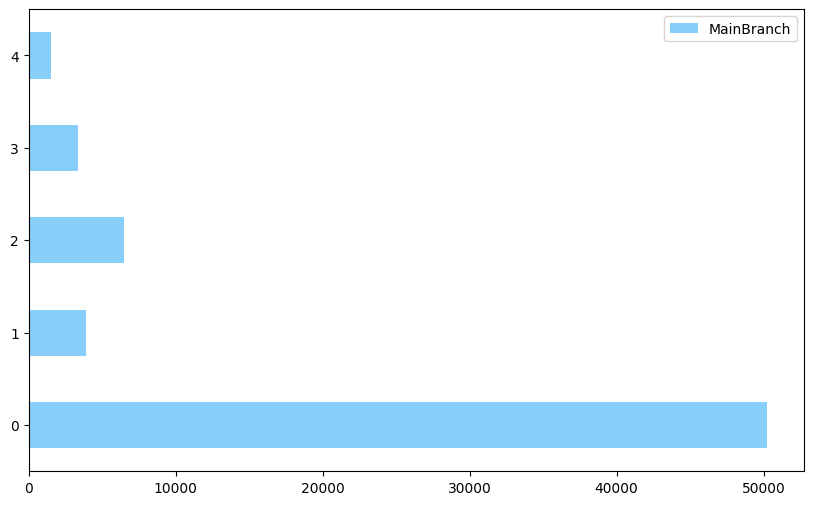

In [47]:
## Write your code here
QUERY = """
SELECT MainBranch, COUNT(*) as MainBranch
from main
group by MainBranch
"""

df=pd.read_sql_query(QUERY,conn)

df.plot(kind='barh', figsize=(10,6), color='lightskyblue')

plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [48]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
